In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datos_limpios_Amsterdam.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9659 non-null   int64  
 1   last_scraped                 9659 non-null   object 
 2   name                         9659 non-null   object 
 3   description                  9659 non-null   object 
 4   neighborhood_overview        9659 non-null   object 
 5   host_location                9659 non-null   object 
 6   host_response_time           9659 non-null   object 
 7   host_response_rate           9659 non-null   object 
 8   host_acceptance_rate         9659 non-null   object 
 9   host_is_superhost            9659 non-null   object 
 10  host_verifications           9659 non-null   object 
 11  host_has_profile_pic         9659 non-null   object 
 12  host_identity_verified       9659 non-null   object 
 13  neighbourhood     

In [4]:
dff=df
dff['room_type'] = dff['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [5]:
df1 = dff[dff["room_type"] ==1]

In [6]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y= df1['price']
X1= df1['room_type'].to_frame()

In [7]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Codigo para convertir un str en float
import re
Y= Y.apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [10]:
model.fit(X=X1, y=Y)

LinearRegression()

In [11]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(306.40257958287594)}

In [ ]:
#Limpiar valores
import re
df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [13]:
#Predicciones
y_pred= model.predict(X=X1)
y_pred

array([306.40257958, 306.40257958, 306.40257958, ..., 306.40257958,
       306.40257958, 306.40257958], shape=(3644,))

<Axes: xlabel='room_type', ylabel='price'>

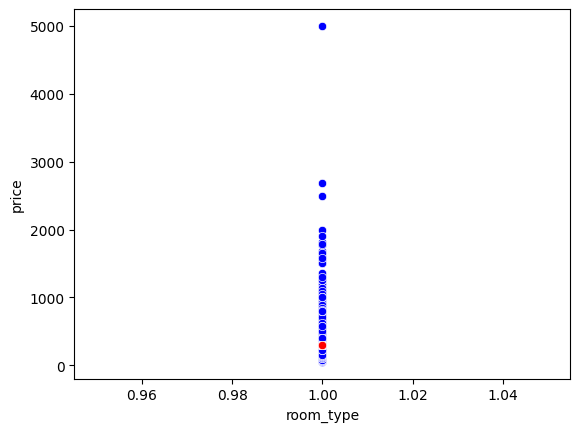

In [14]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [15]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [16]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [17]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [18]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [19]:
X2 = X2.replace({'%': ''}, regex=True).astype(float)

In [20]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [21]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.24918399]),
 'rank_': 1,
 'singular_': array([1860.91576808]),
 'intercept_': np.float64(289.57493341842815)}

In [22]:
#Limpiar valores
import re
df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [23]:
#Predicciones
y_pred2= model2.predict(X=X2)
y_pred2

array([314.49333194, 307.26699637, 302.03413268, ..., 314.24414795,
       299.54229283, 306.27026042], shape=(3644,))

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

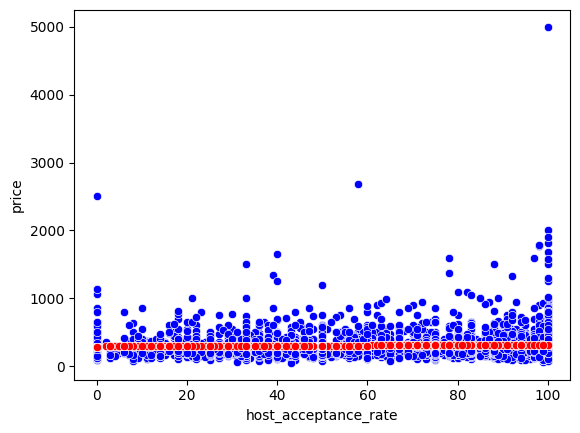

In [24]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [25]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.0014842341849961027

In [26]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.038525760018409794)

In [27]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_3692\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [28]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_is_superhost'] != 'Without information']
Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [29]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [30]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [32]:
#Predicciones
y_pred3= model3.predict(X=X3)
y_pred3

array([304.65404872, 304.65404872, 304.65404872, ..., 304.65404872,
       304.65404872, 304.65404872], shape=(3644,))

<Axes: xlabel='host_is_superhost', ylabel='price'>

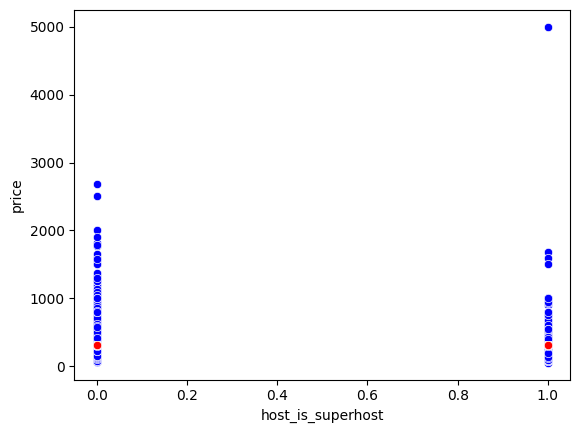

In [33]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [34]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.0003855217319037596

In [35]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.01963470732921068)

In [36]:
#df1 = df1[df1['accommodates'] != 'Does not say']
#df1 = df1[df1['bathrooms'] != 'Without information']
Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [37]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [38]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [39]:
#Predicciones
y_pred4= model4.predict(X=X4)
y_pred4

array([3.06336443, 3.06336443, 3.06336443, ..., 3.06336443, 3.06336443,
       3.06336443], shape=(3644,))

<Axes: xlabel='bathrooms', ylabel='accommodates'>

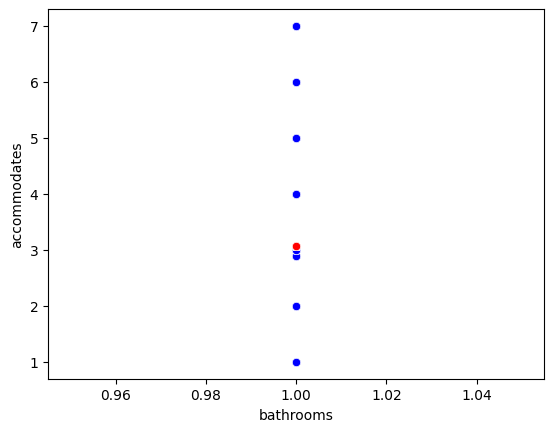

In [40]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [41]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.0

In [42]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.0)

In [43]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [44]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [45]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [46]:
#Limpiar valores
import re
df1['review_scores_cleanliness']= df1['review_scores_cleanliness'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [47]:
#Predicciones
y_pred5= model5.predict(X=X5)
y_pred5

array([310.31042976, 317.41986863, 300.66190559, ..., 283.39612548,
       294.06028378, 317.41986863], shape=(3644,))

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

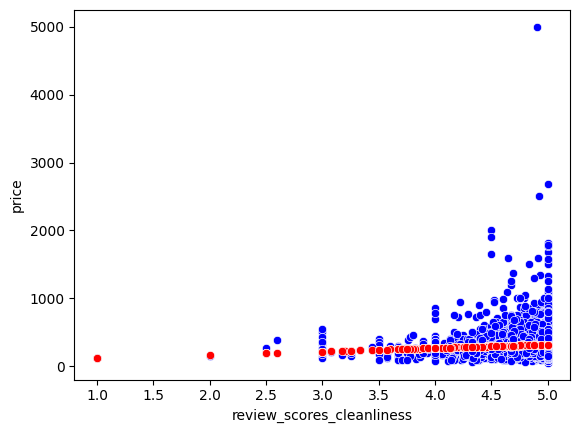

In [48]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [49]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

0.0067099390633349465

In [50]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.08191421771179254)

In [51]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_3692\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [52]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_identity_verified'] != 'Nothing']
Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [53]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [54]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [55]:
#Predicciones
y_pred6= model6.predict(X=X6)
y_pred6

array([306.98666296, 306.98666296, 306.98666296, ..., 306.98666296,
       306.98666296, 306.98666296], shape=(3644,))

<Axes: xlabel='host_identity_verified', ylabel='price'>

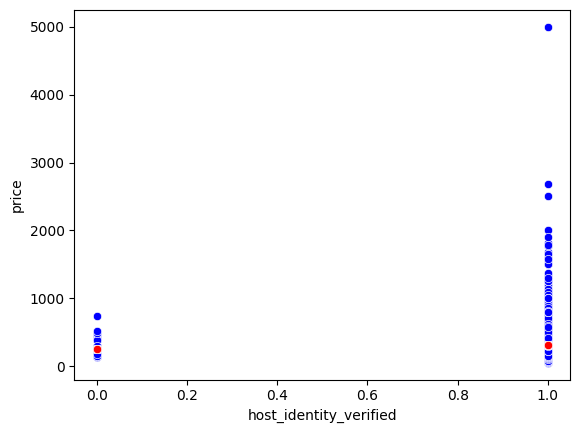

In [56]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [57]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.0006862875828298476

In [58]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.026197091113897505)

In [59]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_3692\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [60]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['instant_bookable'] != 'Nothing']
Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [61]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [62]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [63]:
#Predicciones
y_pred7= model7.predict(X=X7)
y_pred7

array([304.26014991, 304.26014991, 304.26014991, ..., 321.92307692,
       304.26014991, 304.26014991], shape=(3644,))

<Axes: xlabel='instant_bookable', ylabel='price'>

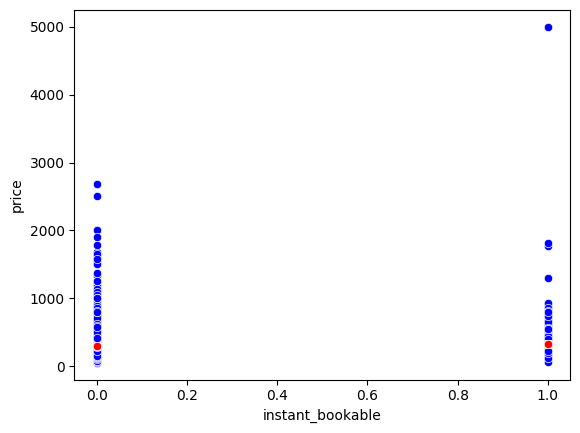

In [64]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [65]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.0008363716851408354

In [66]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.02892009137504298)

In [67]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Entire home': 3,
    'Entire loft': 4,
    'Houseboat': 5,
    'Entire townhouse': 6,
    'Entire serviced apartment': 7,
    'Boat': 8,
    'Entire guest suite': 9,
    'Entire guesthouse': 10,
    'Entire place': 11,
    'Entire villa': 12,
    'Room in aparthotel': 13,
    'Entire vacation home': 14,
    'Tiny home': 15,
    'Entire cabin': 16,
    'Casa particular': 17,
    'Entire cottage': 18,
    'Camper/RV': 19,
    'Barn': 20,
    'Entire chalet': 21,
})

C:\Users\lapep\AppData\Local\Temp\ipykernel_3692\3364968966.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


In [68]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['property_type'] != 'Nothing']
Y8= df1['price']
X8= df1['property_type'].to_frame()

In [69]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [70]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [71]:
#Predicciones
y_pred8= model8.predict(X=X8)
y_pred8

array([305.08112373, 308.5035723 , 301.65867516, ..., 301.65867516,
       301.65867516, 322.19336657], shape=(3644,))

<Axes: xlabel='property_type', ylabel='price'>

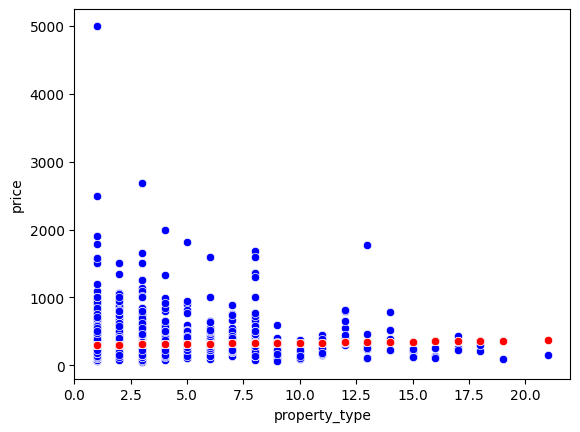

In [72]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [73]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.0016122990470839316

In [74]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.04015344377614368)

In [75]:
#Declaramos las variables dependientes e independientes para la regresión lineal 
Vars_Indep = df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']]
Var_Dep = df1[['price']]

In [76]:
#Declaramos las variables dependientes e independientes para la regresión lineal accommodates vs bathrooms
Vars_Indep2= df1 [['bathrooms']]
Var_Dep2 = df1[['accommodates']]

In [77]:
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model10= LinearRegression()
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [78]:
model9.fit(X=Vars_Indep, y=Var_Dep)
model10.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [79]:
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
        'host_identity_verified', 'host_is_superhost', 'instant_bookable',
        'property_type'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[ 0.        , 53.16069913,  0.15552313, 59.64463051, -1.71274681,
         14.4628556 ,  3.05509665]]),
 'rank_': 6,
 'singular_': array([1861.07434566,  139.50116329,   21.73243747,   19.64835464,
          17.43082947,    6.6152568 ,    0.        ]),
 'intercept_': array([-26.03745866])}

In [80]:
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.]]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': array([3.06336443])}

In [81]:
y_pred= model9.predict(X=df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
y_pred

array([[313.63067599],
       [319.61809972],
       [292.69888997],
       ...,
       [296.70774127],
       [284.23276778],
       [331.21639378]], shape=(3644, 1))

In [82]:
# Lista de columnas a conservar
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar el DataFrame para conservar solo esas columnas
df1= df1[columnas_a_conservar]

In [83]:
#insertamos la columna de predicciones en el DataFrame 
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
34,313.630676,599.0,1,4.86,100.0,1,0,0,2.0,1.0,2
38,319.618100,250.0,1,5.00,71.0,1,0,0,2.9,1.0,3
39,292.698890,195.0,1,4.67,50.0,1,0,0,2.0,1.0,1
99,319.899959,375.0,1,4.91,25.0,1,0,0,4.0,1.0,7
108,322.005314,375.0,1,4.59,100.0,1,1,0,2.9,1.0,10
...,...,...,...,...,...,...,...,...,...,...,...
9646,309.408939,400.0,1,5.00,25.0,1,0,0,4.0,1.0,2
9649,296.195108,406.0,1,4.69,46.0,1,0,0,2.0,1.0,2
9650,296.707741,222.0,1,4.33,99.0,1,0,1,2.0,1.0,1
9653,284.232768,300.0,1,4.54,40.0,1,0,0,2.0,1.0,1


In [84]:
y_pred2= model10.predict(X=df1[['bathrooms']])
y_pred2

array([[3.06336443],
       [3.06336443],
       [3.06336443],
       ...,
       [3.06336443],
       [3.06336443],
       [3.06336443]], shape=(3644, 1))

In [85]:
df1.insert(1, 'Predicciones2', y_pred2)
df1

,Predicciones,Predicciones2,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
34,313.630676,3.063364,599.0,1,4.86,100.0,1,0,0,2.0,1.0,2
38,319.618100,3.063364,250.0,1,5.00,71.0,1,0,0,2.9,1.0,3
39,292.698890,3.063364,195.0,1,4.67,50.0,1,0,0,2.0,1.0,1
99,319.899959,3.063364,375.0,1,4.91,25.0,1,0,0,4.0,1.0,7
108,322.005314,3.063364,375.0,1,4.59,100.0,1,1,0,2.9,1.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
9646,309.408939,3.063364,400.0,1,5.00,25.0,1,0,0,4.0,1.0,2
9649,296.195108,3.063364,406.0,1,4.69,46.0,1,0,0,2.0,1.0,2
9650,296.707741,3.063364,222.0,1,4.33,99.0,1,0,1,2.0,1.0,1
9653,284.232768,3.063364,300.0,1,4.54,40.0,1,0,0,2.0,1.0,1


In [86]:
coef_Deter9= model9.score(X=Vars_Indep, y=Var_Dep)
coef_Deter9

0.010877360184574636

In [87]:
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.10429458367803496)

In [88]:
coef_Deter10= model10.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter10

0.0

In [89]:
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.0)

In [90]:
df1['predicted_price'] = model9.predict(df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
df1['predicted_accommodates'] = model10.predict(df1[['bathrooms']])

In [91]:
df1= df1.drop(['room_type'], axis=1)

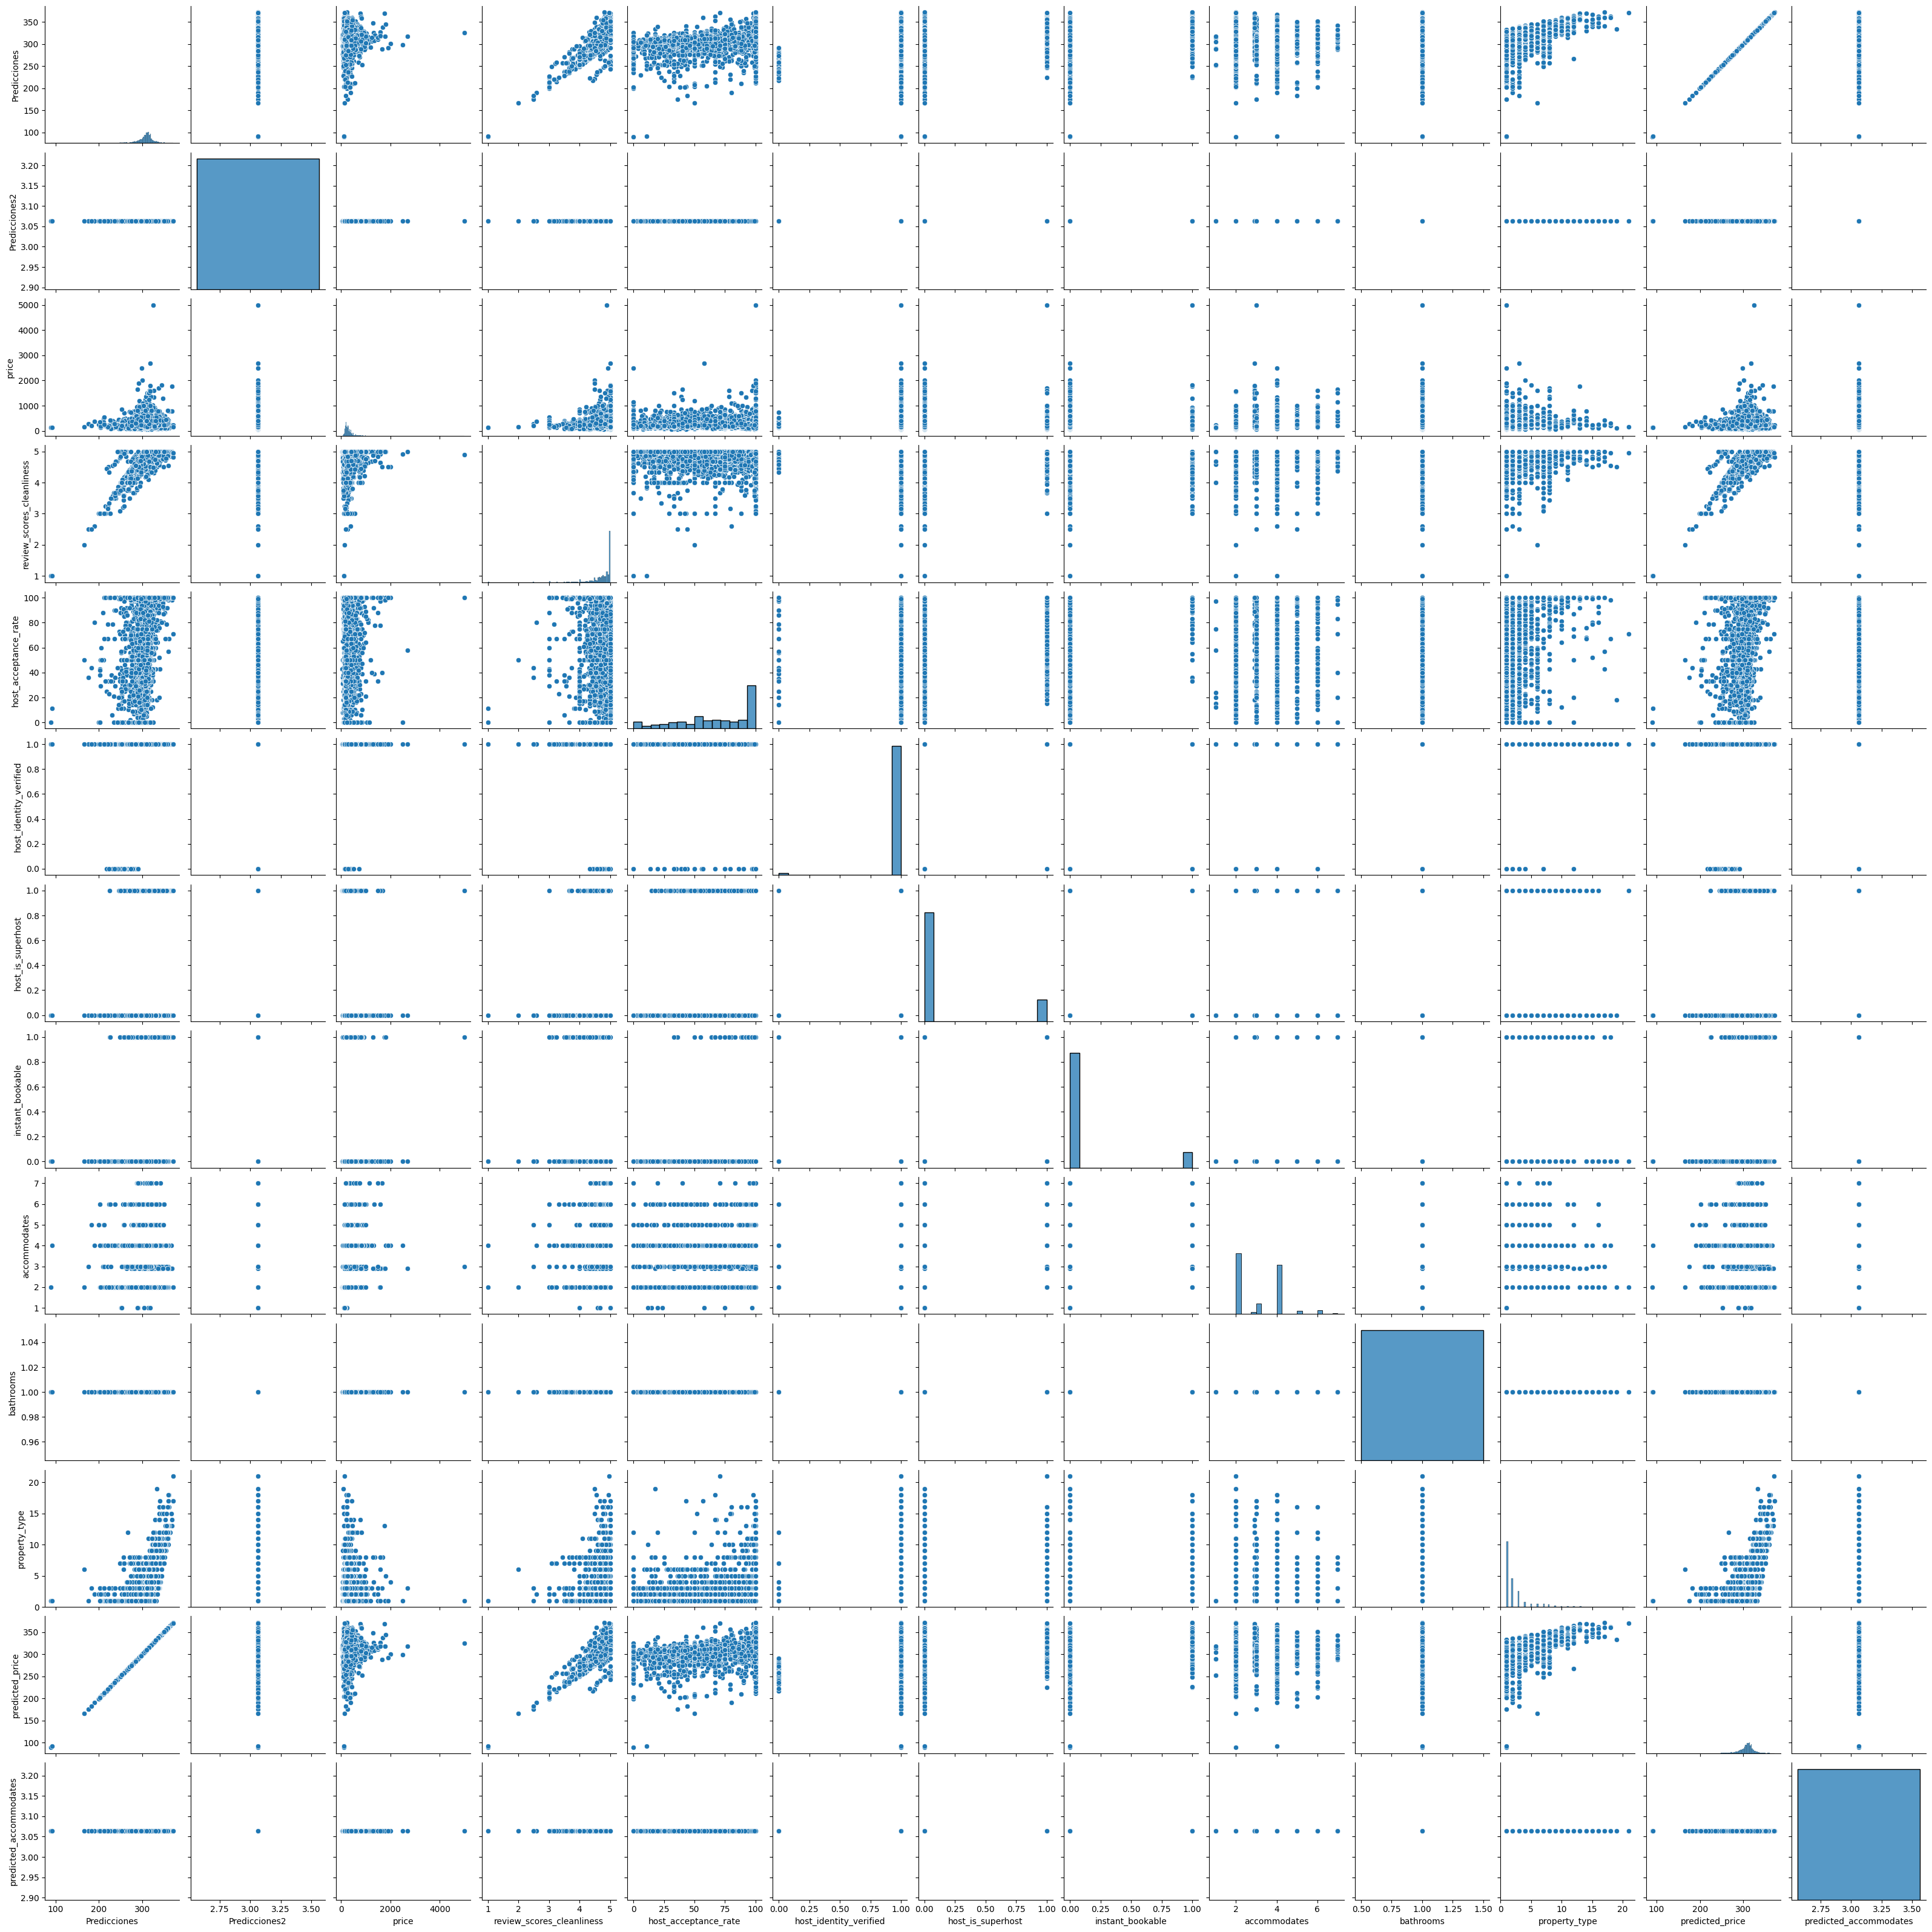

In [92]:
sns.pairplot(df1)

In [93]:
Corr_Factors9= df1.corr()
Corr_Factors9

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.104295,0.785412,0.369394,0.251184,0.188262,0.277292,0.002992,NaN,0.385000,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.104295,NaN,1.000000,0.081914,0.038526,0.026197,0.019635,0.028920,0.341266,NaN,0.040153,0.104295,NaN
review_scores_cleanliness,0.785412,NaN,0.081914,1.000000,0.024787,-0.023741,0.078262,-0.096689,-0.079053,NaN,-0.030946,0.785412,NaN
host_acceptance_rate,0.369394,NaN,0.038526,0.024787,1.000000,-0.030477,0.283116,0.363998,0.003385,NaN,0.157570,0.369394,NaN
host_identity_verified,0.251184,NaN,0.026197,-0.023741,-0.030477,1.000000,0.043268,-0.087848,0.023708,NaN,-0.051650,0.251184,NaN
host_is_superhost,0.188262,NaN,0.019635,0.078262,0.283116,0.043268,1.000000,0.120765,0.031428,NaN,0.140201,0.188262,NaN
instant_bookable,0.277292,NaN,0.028920,-0.096689,0.363998,-0.087848,0.120765,1.000000,0.073679,NaN,0.225058,0.277292,NaN
accommodates,0.002992,NaN,0.341266,-0.079053,0.003385,0.023708,0.031428,0.073679,1.000000,NaN,0.127837,0.002992,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
Corr_Factors10= abs(Corr_Factors9)
Corr_Factors10

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.104295,0.785412,0.369394,0.251184,0.188262,0.277292,0.002992,NaN,0.385000,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.104295,NaN,1.000000,0.081914,0.038526,0.026197,0.019635,0.028920,0.341266,NaN,0.040153,0.104295,NaN
review_scores_cleanliness,0.785412,NaN,0.081914,1.000000,0.024787,0.023741,0.078262,0.096689,0.079053,NaN,0.030946,0.785412,NaN
host_acceptance_rate,0.369394,NaN,0.038526,0.024787,1.000000,0.030477,0.283116,0.363998,0.003385,NaN,0.157570,0.369394,NaN
host_identity_verified,0.251184,NaN,0.026197,0.023741,0.030477,1.000000,0.043268,0.087848,0.023708,NaN,0.051650,0.251184,NaN
host_is_superhost,0.188262,NaN,0.019635,0.078262,0.283116,0.043268,1.000000,0.120765,0.031428,NaN,0.140201,0.188262,NaN
instant_bookable,0.277292,NaN,0.028920,0.096689,0.363998,0.087848,0.120765,1.000000,0.073679,NaN,0.225058,0.277292,NaN
accommodates,0.002992,NaN,0.341266,0.079053,0.003385,0.023708,0.031428,0.073679,1.000000,NaN,0.127837,0.002992,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

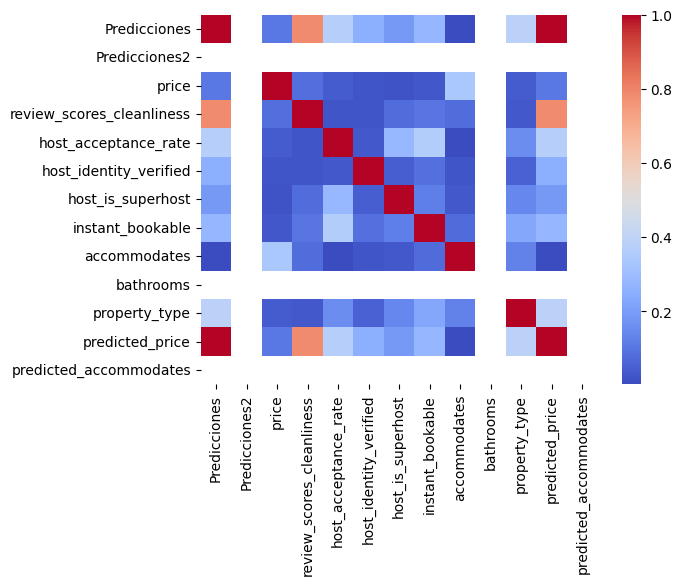

In [95]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'coolwarm')
Heart_Nap

<Axes: >

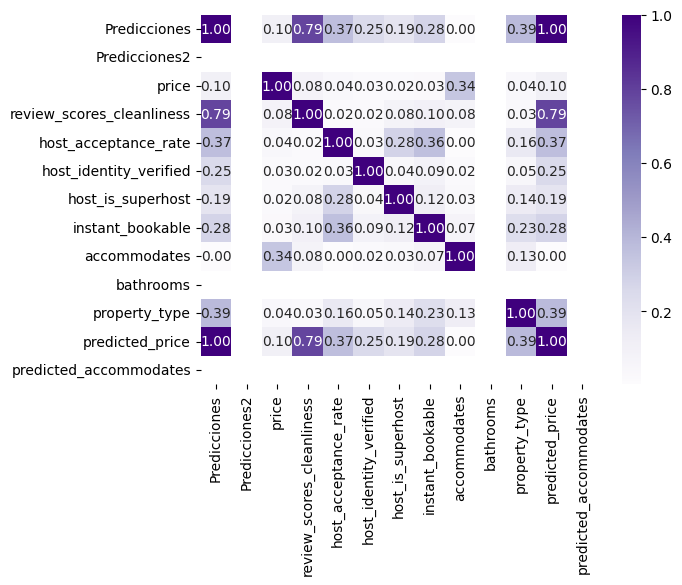

In [96]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [97]:
Corr_Factors11 = df1.corr()
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.104295,0.785412,0.369394,0.251184,0.188262,0.277292,0.002992,NaN,0.385000,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.104295,NaN,1.000000,0.081914,0.038526,0.026197,0.019635,0.028920,0.341266,NaN,0.040153,0.104295,NaN
review_scores_cleanliness,0.785412,NaN,0.081914,1.000000,0.024787,-0.023741,0.078262,-0.096689,-0.079053,NaN,-0.030946,0.785412,NaN
host_acceptance_rate,0.369394,NaN,0.038526,0.024787,1.000000,-0.030477,0.283116,0.363998,0.003385,NaN,0.157570,0.369394,NaN
host_identity_verified,0.251184,NaN,0.026197,-0.023741,-0.030477,1.000000,0.043268,-0.087848,0.023708,NaN,-0.051650,0.251184,NaN
host_is_superhost,0.188262,NaN,0.019635,0.078262,0.283116,0.043268,1.000000,0.120765,0.031428,NaN,0.140201,0.188262,NaN
instant_bookable,0.277292,NaN,0.028920,-0.096689,0.363998,-0.087848,0.120765,1.000000,0.073679,NaN,0.225058,0.277292,NaN
accommodates,0.002992,NaN,0.341266,-0.079053,0.003385,0.023708,0.031428,0.073679,1.000000,NaN,0.127837,0.002992,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
Corr_Factors11= abs(Corr_Factors9)
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.104295,0.785412,0.369394,0.251184,0.188262,0.277292,0.002992,NaN,0.385000,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.104295,NaN,1.000000,0.081914,0.038526,0.026197,0.019635,0.028920,0.341266,NaN,0.040153,0.104295,NaN
review_scores_cleanliness,0.785412,NaN,0.081914,1.000000,0.024787,0.023741,0.078262,0.096689,0.079053,NaN,0.030946,0.785412,NaN
host_acceptance_rate,0.369394,NaN,0.038526,0.024787,1.000000,0.030477,0.283116,0.363998,0.003385,NaN,0.157570,0.369394,NaN
host_identity_verified,0.251184,NaN,0.026197,0.023741,0.030477,1.000000,0.043268,0.087848,0.023708,NaN,0.051650,0.251184,NaN
host_is_superhost,0.188262,NaN,0.019635,0.078262,0.283116,0.043268,1.000000,0.120765,0.031428,NaN,0.140201,0.188262,NaN
instant_bookable,0.277292,NaN,0.028920,0.096689,0.363998,0.087848,0.120765,1.000000,0.073679,NaN,0.225058,0.277292,NaN
accommodates,0.002992,NaN,0.341266,0.079053,0.003385,0.023708,0.031428,0.073679,1.000000,NaN,0.127837,0.002992,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


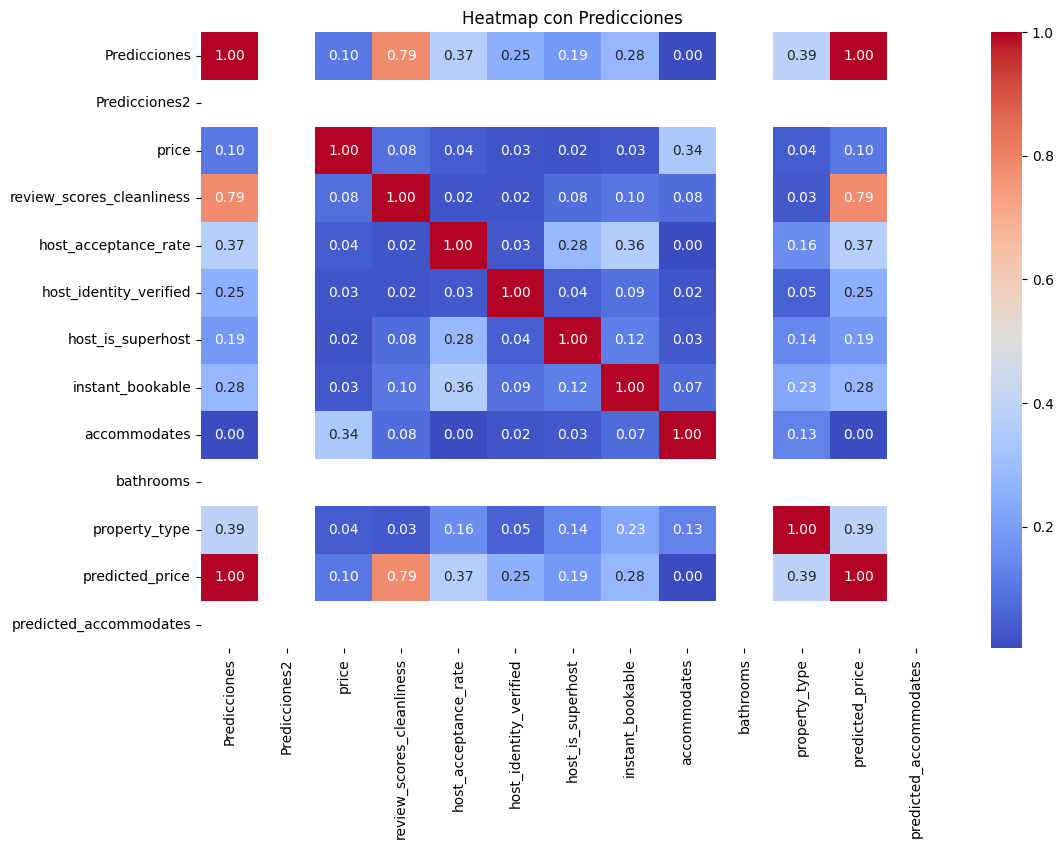

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors11, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()